In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
con = sqlite3.connect(r'C:\Users\viacheslav.sobolenko\Downloads\amazon/database.sqlite')

In [6]:
type(con)

sqlite3.Connection

In [8]:
df = pd.read_sql_query('SELECT * FROM Reviews', con)

In [9]:
df.shape

(568454, 10)

In [10]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
df['HelpfulnessNumerator']>df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [19]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [20]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [23]:
df_valid.duplicated(['UserId', 'ProfileName', 'Time', 'Text']).sum()

174521

In [24]:
df_valid.shape


(568452, 10)

In [25]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])

In [26]:
data.shape

(393931, 10)

In [28]:
data.dtypes


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [30]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [35]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

C:\Users\viacheslav.sobolenko\AppData\Local\Temp\ipykernel_22044\145857406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'], unit='s')


In [36]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [38]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [40]:
data['ProfileName'].nunique()

218418

In [41]:
data['UserId'].nunique()

256059

In [46]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count', 
                              'Text':'count', 
                              'Score':'mean', 
                              'ProductId':'count'}).sort_values(by='ProductId', ascending=False)

In [49]:
recommend_df.index[:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [50]:
recommend_df['ProductId'][:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: ProductId, dtype: int64

In [51]:
recommend_df['ProductId'][:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

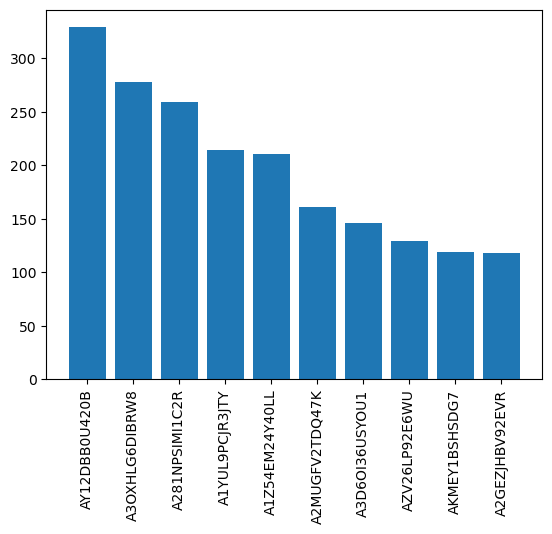

In [54]:
plt.bar(recommend_df.index[:10], recommend_df['ProductId'][:10].values)
plt.xticks(rotation='vertical')

In [55]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [58]:
len(data['ProductId'].unique())

67624

In [64]:
product_count = data['ProductId'].value_counts().to_frame()

In [65]:
product_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [75]:
product_count['ProductId']>500

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [79]:
freq_prod_ids = product_count[product_count['ProductId']>500].index

In [80]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [81]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [83]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [84]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

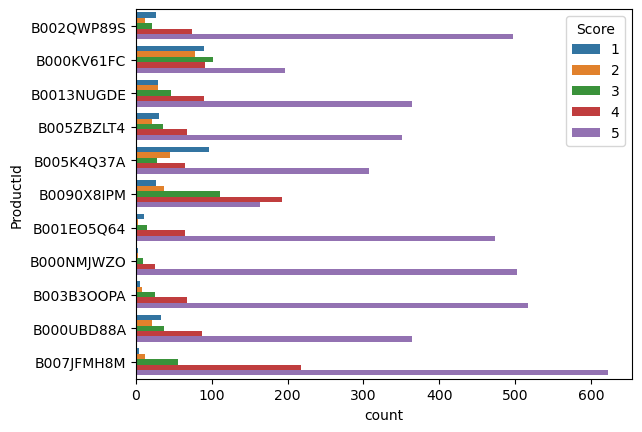

In [87]:
sns.countplot(y='ProductId', data=freq_prod_df, hue='Score')

In [88]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [93]:
x = user_count = data['UserId'].value_counts()

In [94]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [97]:
data['viewer_type'] = data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")

In [98]:
data.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent


In [102]:
not_freq_df = data[data['viewer_type']=='Not Frequent']
freq_df = data[data['viewer_type']=='Frequent']

In [108]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [109]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<Axes: >

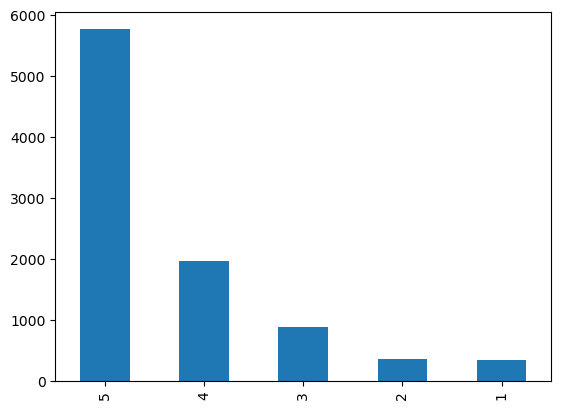

In [111]:
freq_df['Score'].value_counts().plot(kind='bar')

<Axes: >

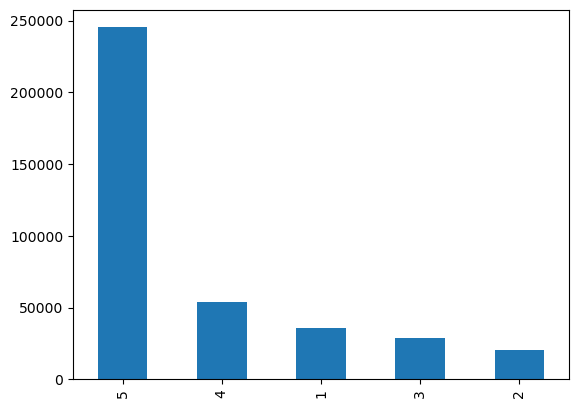

In [112]:
not_freq_df['Score'].value_counts().plot(kind='bar')

In [113]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [117]:
data[['UserId','Text']]

,UserId,Text
0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,This is a confection that has been around a fe...
3,A395BORC6FGVXV,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,Great taffy at a great price. There was a wid...
...,...,...
568449,A28KG5XORO54AY,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,These are the BEST treats for training and rew...


In [123]:
len(data['Text'][0].split(' '))

49

In [129]:
def calculate_length(text):
    return len(text.split(' '))

In [132]:
data['text_length'] = data['Text'].apply(calculate_length)

In [134]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [135]:
not_freq_data = data[data['viewer_type']=='Not Frequent']
freq_data = data[data['viewer_type']=='Frequent']

(0.0, 400.0)

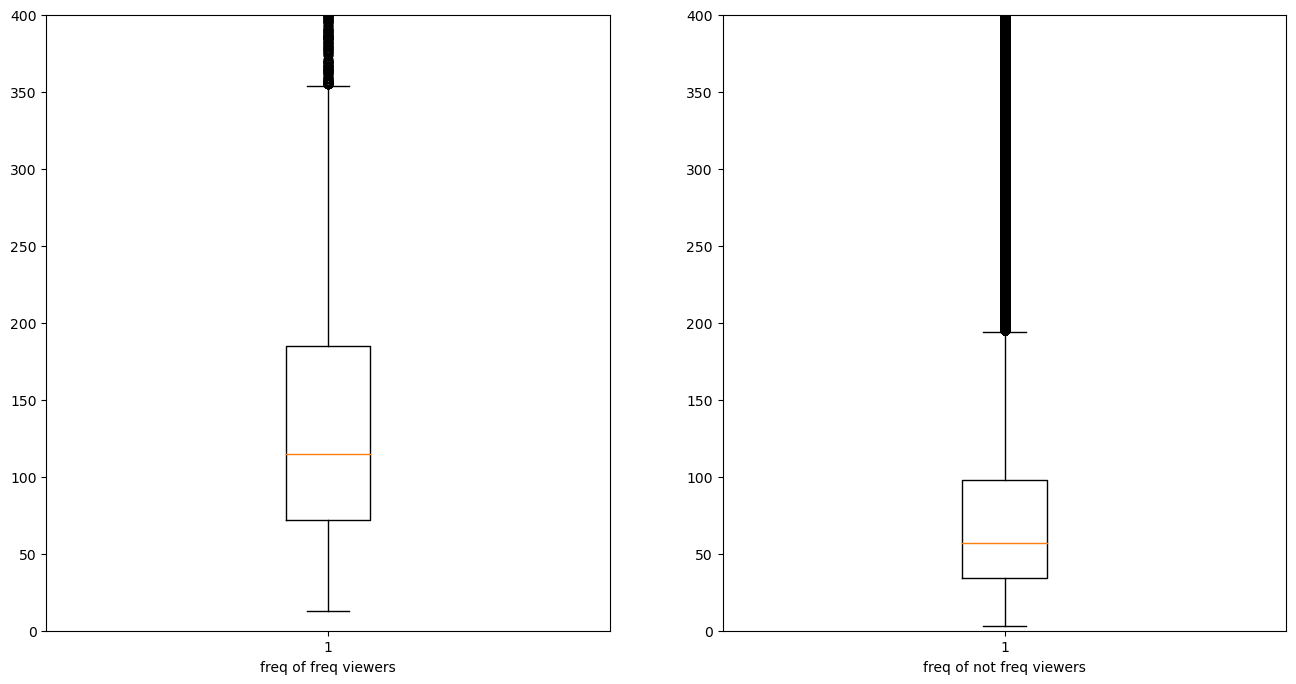

In [152]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['text_length'])
ax1.set_xlabel('freq of freq viewers')
ax1.set_ylim(0,400)


ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['text_length'])
ax2.set_xlabel('freq of not freq viewers')
ax2.set_ylim(0,400)

In [165]:
!pip install textblob

In [166]:
from textblob import TextBlob

In [157]:
data['Summary'][0]

'Good Quality Dog Food'

In [172]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [169]:
data.shape

(393931, 12)

In [176]:
sample = data[:50000]

In [177]:
TextBlob(sample['Summary'][0]).sentiment.polarity

0.7

In [182]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [183]:
len(polarity)

50000

In [184]:
sample['polarity'] = polarity

In [187]:
pos_pol = sample[sample['polarity']>0]
neg_pol = sample[sample['polarity']<0]

In [188]:
from collections import Counter

In [192]:
Counter(neg_pol['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [193]:
Counter(pos_pol['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]